# Project - IFT712

## Resume

The objective of the project is to test at least six classification methods on a Kaggle database (www.kaggle.com) with the scikit-learn library (https://scikit-learn.org). The database for this study is the tree leaf classification challenge (www.kaggle.com/c/leaf-classification). For this project, it is expected that the best practices of cross-validation and hyper-parameter search will be put forward to identify the best possible solution to the problem. 

In [33]:
import numpy as np
import pandas as pd 

## Data preparation

In [1]:
import data_manager.data_manager
import data_manager.data_organizer

In [2]:
# Loading the database
db = data_manager.data_manager.DatabaseManager('')
db.load()
# Storing the data
dataset = db.get_train_dataset().drop('id', axis=1)

In [3]:
do = data_manager.data_organizer.DataOrganizer()
do.shuffle(dataset, dataset.columns) # Shuffling the data
do.standardize(dataset, dataset.columns[1:]) # Standardization of numeric values
do.numerize(dataset, dataset.columns[0]) # Numerization of the name of each leaf

In [4]:
# Dividing the data in a training and test dataset
training_dataset = dataset[:int(dataset.shape[0] * 0.7)]
test_dataset = dataset[int(dataset.shape[0] * 0.7):]

# Dividing inputs and targets
training_inputs = training_dataset.drop('species', axis=1)
training_targets = training_dataset['species']

test_inputs = test_dataset.drop('species', axis=1)
test_targets = test_dataset['species']

## Methods of classification

We will test 6 different classification methods in the following order:

-   1) KNN
-   2) SVM
-   3) Logistic Regression
-   4) MLP
-   5) Perceptron
-   6) SVC

### 1) KNN :

In [5]:
import models.kneighbors_classifier
knn = models.kneighbors_classifier.KneighborsClassifier()

The list of hyperparameters we are looking to optimize : grid_parameters = {'n_neighbors': range(2, 15)}

In [6]:
knn.train(training_inputs, training_targets)

In [7]:
knn.score(test_inputs, test_targets)

0.9595959595959596

In [8]:
print(knn.get_classifier().best_params_)

{'n_neighbors': 2}


### 2) SVM :

In [9]:
import models.svm_classifier
svm = models.svm_classifier.SVMClassifier()

The list of hyperparameters we are looking to optimize : 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']} 

In [10]:
svm.train(training_inputs, training_targets)

In [11]:
svm.score(test_inputs, test_targets)

0.98989898989899

In [12]:
print(svm.get_classifier().best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


### 3) Logistic Regression :

In [13]:
import models.logistic_regression_classifier
lr = models.logistic_regression_classifier.LogisticRegressionClassifier()

The list of hyperparameters we are looking to optimize : param_grid = {'C': [0.1, 1, 10, 100, 1000]}

In [14]:
lr.train(training_inputs, training_targets)

In [15]:
lr.score(test_inputs, test_targets)

0.98989898989899

In [16]:
print(lr.get_classifier().best_params_)

{'C': 1000}


### 4) MLP :

In [17]:
import models.mlp_classifier
mlp = models.mlp_classifier.MLPClassifier()

The list of hyperparameters we are looking to optimize : param_grid = {'alpha': 10.0 ** -np.arange(1, 6), 'hidden_layer_sizes': [(99,), (99, 99), (99, 99, 99)]}

We chose 99 neurons by layer because there are 99 different leaves but it would be interesting to test if other configurations can improve the score.

In [18]:
mlp.train(training_inputs, training_targets)

In [19]:
mlp.score(test_inputs, test_targets)

0.9831649831649831

In [20]:
print(mlp.get_classifier().best_params_)

{'alpha': 0.1, 'hidden_layer_sizes': (99,)}


### 5) Perceptron :

In [21]:
import models.perceptron_classifier
per = models.perceptron_classifier.PerceptronClassifier()

The list of hyperparameters we are looking to optimize : param_grid = {'alpha': 10.0 ** -np.arange(1, 6)}

In [22]:
per.train(training_inputs, training_targets)

In [23]:
per.score(test_inputs, test_targets)

0.8316498316498316

In [24]:
print(per.get_classifier().best_params_)

{'alpha': 0.1}


### 6) SVC :

In [25]:
import models.svc_classifier
svc = models.svc_classifier.SVCClassifier()

The list of hyperparameters we are looking to optimize : param_grid = {'C': [0.1, 1, 10],
                    'loss': ['hinge', 'squared_hinge']}

In [26]:
svc.train(training_inputs, training_targets)

C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number 

Même en augmentant le nombre d'itérations maximale, l'algorithme ne parvient pas à converger. Il se peut qu'il ne soit pas adapter au problème mais il serait intéressant de tester l'algorithme avec une grille d'hyperparamètres plus large. On constate tout de même qu'il donne de bons résultats
Even by increasing the number of maximum iterations, the algorithm was not able to converge. SVC might not be adapted to the problem since it is linear. Still, his results 

In [27]:
svc.score(test_inputs, test_targets)

0.9528619528619529

In [28]:
print(svc.get_classifier().best_params_)


{'C': 0.1, 'loss': 'squared_hinge'}


## Visual Comparison

In [29]:
# List of classifier for ranking
classifiers = [
    knn,
    svm,
    lr,
    mlp,
    per,
    svc,    
]

In [38]:
# Create Dataframe for Visual Comparison
cols=["Classifier", "Accuracy"] 
l = [] # created list 
for clf in classifiers:
    name = clf.__class__.__name__
    score =clf.score(test_inputs, test_targets)
    l.append([name,score])
    
df_classifier = pd.DataFrame(data = l,columns=cols)

In [40]:
df_classifier

,Classifier,Accuracy
0,KneighborsClassifier,0.959596
1,SVMClassifier,0.989899
2,LogisticRegressionClassifier,0.989899
3,MLPClassifier,0.983165
4,PerceptronClassifier,0.831650
5,SVCClassifier,0.952862


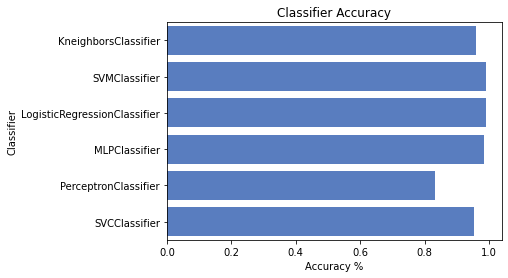

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_color_codes("muted")
sns.barplot(y='Classifier', x='Accuracy', data=df_classifier, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()